In [2]:
pd.set_option('max_columns', 100)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,b4d8a653ea,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,-0.688706,7e5c97705a,...,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0,2
1,467f9617a3,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.870871,5624b8f759,...,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0,4
2,190436e528,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.437655,5624b8f759,...,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0,3
3,43859085bc,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.004439,f67f142e40,...,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
4,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.480977,7e5c97705a,...,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0,3


# Build a quick baseline

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.y
X = X.drop('y', axis=1)

# fill NANs 
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

NameError: name 'np' is not defined

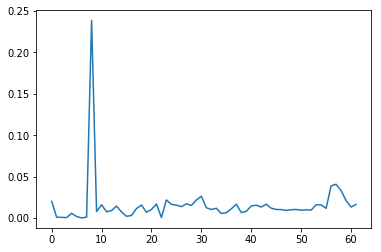

In [5]:
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

There is something interesting about `x8`.

In [6]:
# we see it was standard scaled, most likely, if we concat train and test, we will get exact mean=1, and std 1 
print 'Mean:', train.x8.mean()
print 'std:', train.x8.std()

Mean: -0.000252352028622
std: 1.02328163601


In [7]:
# And we see that it has a lot of repeated values
train.x8.value_counts().head(15)

-2.984750    2770
 0.480977    2569
 0.610941    1828
 0.654263    1759
 0.567620    1746
 0.697585    1691
 0.524298    1639
 0.740906    1628
 0.394333    1610
 0.437655    1513
 0.351012    1450
 0.264369    1429
 0.307690    1401
 0.221047    1372
 0.784228    1293
Name: x8, dtype: int64

In [8]:
# It's very hard to work with scaled feature, so let's try to scale them back
# Let's first take a look at difference between neighbouring values in x8

x8_unique = train.x8.unique()
x8_unique_sorted = np.sort(x8_unique)
                           
np.diff(x8_unique_sorted)

array([ 43.27826527,  38.98942817,   0.21660793,   0.04332159,
         0.17328635,   0.21660793,   0.08664317,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04332159,
         0.04332159,   0.04332159,   0.04332159,   0.04

In [9]:
# The most of the diffs are 0.04332159! 
# The data is scaled, so we don't know what was the diff value for the original feature
# But let's assume it was 1.0
# Let's devide all the numbers by 0.04332159 to get the right scaling
# note, that feature will still have zero mean

np.diff(x8_unique_sorted/0.04332159)

array([ 998.99992752,  899.9999347 ,    4.99999964,    0.99999993,
          3.99999971,    4.99999964,    1.99999985,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999993,
          0.99999993,    0.99999993,    0.99999993,    0.99999

In [10]:
(train.x8/0.04332159).head(10)

0   -15.897530
1    20.102468
2    10.102468
3     0.102469
4    11.102468
5   -68.897526
6    10.102468
7    15.102468
8     9.102468
9   -68.897526
Name: x8, dtype: float64

In [11]:
# Ok, now we see .102468 in every value
# this looks like a part of a mean that was subtracted during standard scaling
# If we subtract it, the values become almost integers
(train.x8/0.04332159 - .102468).head(10)

0   -15.999998
1    20.000000
2    10.000000
3     0.000001
4    11.000000
5   -68.999994
6    10.000000
7    15.000000
8     9.000000
9   -68.999994
Name: x8, dtype: float64

In [12]:
# let's round them 
x8_int = (train.x8/0.04332159 - .102468).round()
x8_int.head(10)

0   -16.0
1    20.0
2    10.0
3     0.0
4    11.0
5   -69.0
6    10.0
7    15.0
8     9.0
9   -69.0
Name: x8, dtype: float64

In [13]:
# Ok, what's next? In fact it is not obvious how to find shift parameter, 
# and how to understand what the data this feature actually store
# But ...

In [14]:
x8_int.value_counts()

-69.0      2770
 11.0      2569
 14.0      1828
 15.0      1759
 13.0      1746
 16.0      1691
 12.0      1639
 17.0      1628
 9.0       1610
 10.0      1513
 8.0       1450
 6.0       1429
 7.0       1401
 5.0       1372
 18.0      1293
 1.0       1290
 4.0       1276
 2.0       1250
 3.0       1213
-1.0       1085
 0.0       1080
-2.0       1006
-4.0        995
-3.0        976
-5.0        954
-8.0        923
-9.0        921
-6.0        906
 19.0       893
-7.0        881
           ... 
 26.0         3
-40.0         3
-41.0         3
 25.0         2
-59.0         2
 31.0         2
 34.0         2
-46.0         2
-49.0         2
 33.0         2
-42.0         2
 32.0         2
 37.0         2
 30.0         2
-45.0         2
-54.0         1
 36.0         1
-51.0         1
 27.0         1
 79.0         1
-47.0         1
 69.0         1
 70.0         1
-50.0         1
-1968.0       1
 42.0         1
-63.0         1
-48.0         1
-64.0         1
 35.0         1
Name: x8, Length: 99, dt

In [ ]:
# do you see this -1968? Doesn't it look like a year? ... So my hypothesis is that this feature is a year of birth! 
# Maybe it was a textbox where users enter their year of birth, and someone entered 0000 instead
# The hypothesis looks plausible, isn't it?

In [22]:
(x8_int + 1968.0).value_counts().sort_index()

0.0          1
999.0        4
1899.0    2770
1904.0       1
1905.0       1
1909.0       2
1914.0       1
1916.0       3
1917.0       1
1918.0       1
1919.0       2
1920.0       1
1921.0       1
1922.0       2
1923.0       2
1924.0       4
1925.0       4
1926.0       2
1927.0       3
1928.0       3
1929.0       4
1930.0       4
1931.0      12
1932.0      10
1933.0       7
1934.0      13
1935.0      28
1936.0      35
1937.0      35
1938.0      45
          ... 
1978.0    1513
1979.0    2569
1980.0    1639
1981.0    1746
1982.0    1828
1983.0    1759
1984.0    1691
1985.0    1628
1986.0    1293
1987.0     893
1988.0     624
1989.0     434
1990.0     233
1991.0     110
1992.0      31
1993.0       2
1994.0       3
1995.0       1
1998.0       2
1999.0       2
2000.0       2
2001.0       2
2002.0       2
2003.0       1
2004.0       1
2005.0       2
2010.0       1
2037.0       1
2038.0       1
2047.0       1
Name: x8, Length: 99, dtype: int64

In [23]:
# After the competition ended the organisers told it was really a year of birth